# **Digital image processing – Basics**

<div style="color:#777777;margin-top: -15px;">
<b>Author</b>: Norman Juchler |
<b>Course</b>: MSLS CO4 |
<b>Version</b>: v1.1 <br><br>
<!-- Date: 27.02.2025 -->
<!-- Comments: ... -->
</div>

In this notebook, we will learn how to handle images in Python using the OpenCV and PIL packages. 
We will also learn how to read, create and modify images using these libraries.

<!-- 
## **Exercises**
* [Exercise 1](#exercise1)  
* [Exercise 2](#exercise2)  
* [Exercise 3](#exercise3)  
* [Exercise 4](#exercise4)  
* [Exercise 5](#exercise5)  
* [Exercise 6](#exercise6)  
-->

---

## **Preparations**

Let's begin with the usual preparatory steps...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import PIL

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload
%autoreload 2

# Enable vectorized output (for nicer plots)
%config InlineBackend.figure_formats = ["svg"]

# Inline backend configuration
%matplotlib inline

# Enable this line if you want to use the interactive widgets
# It requires the ipympl package to be installed.
#%matplotlib widget

import sys
sys.path.insert(0, "../")
import tools

---

<a id='exercise1'></a>

## **&#9734;  Exercise 1 – Image representation**

We have already learned that a digital (grayscale) image is represented as a 2D array of pixel values. In this exercise, we will explore how to load an image and access its pixel values using OpenCV, a powerful library for image processing and computer vision, optimized for real-time applications. Although OpenCV is written in C++, it provides Python bindings for ease of use.

A grayscale image is stored as a 2D array of intensity values, where the total number of values is equal to the number of pixels (height $h$ × width $w$). In contrast, a color image is represented as a 3D array with pixel values across multiple channels—for example, an RGB image contains three times as many values as a grayscale image (one set for each color channel: Red, Green, and Blue).

The suitable data structure for handling image data in Python is a NumPy array. In fact, most image processing libraries in Python either use NumPy arrays directly or provide functions to convert images into this format. This makes it easy to combine different libraries when working with images.

To visualize an image, we can use the [`imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function from matplotlib.

### **Instructions**  

1. Read the image `"../data/images/kingfisher-gray.jpg"` using `cv.imread()`. See [this example](https://docs.opencv.org/4.x/db/deb/tutorial_display_image.html) for reference.  
2. Examine the returned array: What is its shape? What is its data type?  
3. Display the image using [`plt.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).    
   **Hint**: Set the argument `cmap="gray"` to properly display the grayscale image.  
4. Retrieve the pixel value at position `(100, 100)`.  
5. Select a **region of interest (ROI)**, starting at pixel (75, 200) with a width of 200 and height of 100 pixels



Height, width:        (400, 600)
Data type:            uint8



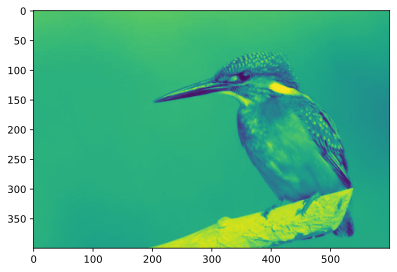

Pixel at [100,100]:   164


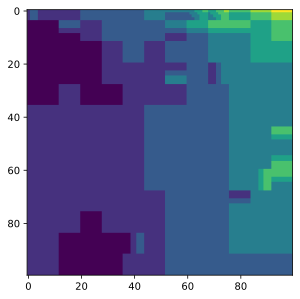

In [8]:
######################
###    EXCERISE    ###
######################

# Read the image
img_path = r"C:\Users\keane\OneDrive - ZHAW\Spring 25\C04\msls-co4-ss25\data\images\kingfisher.jpg"
gray = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

# Print the image properties
print("Height, width:       ",gray.shape)
print("Data type:           ",gray.dtype)
print()

# Display the image
plt.imshow(gray)
plt.show()

# Read the pixel at [100,100]
print("Pixel at [100,100]:  ", gray [100, 100])

# Crop the image and display it
crop = gray[100:200, 100:200]
plt.imshow(crop)
plt.show()


---

<a id='exercise1'></a>

## **&#9734;  Exercise 2 – Digitalization**

Just like time-based data, digital images are represented as arrays of numbers. The digitalization/discretization process is very similar and involves two steps:
1. Sampling: the continuous image is sampled at regular intervals to obtain a grid of pixels.
2. Quantization: the continuous pixel values are quantized to a finite number of levels.

The result is a 2D array of numbers, where each number represents the intensity (or color) of a pixel.


### **Instructions:** 

* Explain the main difference(s) between the sampling of continuous-time signals and the spatial sampling of images.
* Use the image from the previous exercise
* Study the effect of quantization: What happens when you reduce the number of bits?
  * Have a look at the function: quantize(image, nbits). Understand how it works.  
     Note: NumPy does not have built-in data types for n-bit images, so we use 8-bit  
     arrays - but we can still simulate n-bit quantization by rounding the values.
  * Use the function `quantize()` to (artificially) create images with a lower image depth
* Study the effect of spatial sampling: What happens when you reduce the number of pixels?
  * Progressively subsample the image by a factor of two: `gray[::2, ::2]`
  * Reflect: What to expect with this type of subsampling, besides getting a lower resolution?

In [ ]:
def quantize(image, nbits):
    """Method 1: 
    Quantize an image to a lower number of bits. The image must be
    in uint8 format. The number of bits must be between 1 and 8.
    The function works for an arbitrary number of channels.
    """
    assert image.dtype == np.uint8, "Image must be uint8"
    assert nbits > 0 and nbits <= 8, "Invalid number of bits"
    
    # Create equally sized bins for the 256 levels (per channel).
    # np.digitize(img, bins) returns the bin index for each pixel
    # value, where bins is an array of bin edges: [bins[i], bins[i+1])
    # Note that the first bin with index 0 is [-infinity, bins[0]),
    # and the next bin with index 1 is [bins[0], bins[1]). As the 
    # first bin is irrelevant in our case, we need to subtract 1
    # from the returned bin indices (to start from 0).
    #
    # Examples for the bins, depending on the number of bits: 
    #   - nbits=8, bins=[0,1,2,...,256]
    #   - nbits=2, bins=[0,64,128,192,256]
    #   - nbits=1, bins=[0,128,256]
    bins = np.arange(0, 256+1, 256 // 2**nbits)
    ret = np.digitize(image, bins) - 1
    # ret is now an array of bin indices, with the reduced number
    # of levels. However, we still store the image in uint8 format,
    # so we need to multiply the bin indices with the bin width.
    ret *= (256 // 2**nbits)
    return ret.astype(np.uint8)


# def quantize(image, nbits):
#     """Method 2:
#     Equivalent to the previous function, but using a more efficient
#     bitwise operation. The function works for an arbitrary number of
#     channels."""
#     assert image.dtype == np.uint8, "Image must be uint8"
#     assert nbits > 0 and nbits <= 8, "Invalid number of bits"
#     return ((image >> (8 - nbits))) << (8 - nbits)


In [ ]:
######################
###    EXERCISE    ###
######################

# Differences between temporal and spatial sampling?

# Convert to n-bit image
print("Effect of quantization")
print("######################")
nbits = [8, 6, 4, 3, 2, 1]
fig, axes = plt.subplots(2, len(nbits)//2, figsize=(9, 6))
for i, nbit in enumerate(nbits):
    gray_quantized = ...
    ...


# Sub-sample the original image
print("Effect of spatial sampling")
print("##########################")
fig, axes = plt.subplots(2, len(nbits)//2, figsize=(9, 6))
gray_sub = gray.copy()
for i in range(1,6):
    gray_sub = ...
    ...

---

<a id='exercise3'></a>

## **&#9734;  Exercise 3 – Color representation**

Gray is dull! Let's use more color in the next exercise. We again read in the same image, but this time in color. Let's try it!


In [ ]:

color = cv.imread("../data/images/kingfisher.jpg")
# A convenient function to display an image directly in the notebook
tools.display_image(color)

print("Height, width, channels:", color.shape)

The image is in fact a color image: The image is now represented using 3 channels. But the colors in the image look strange. The reason for this is that OpenCV reads the image in **BGR format**, while matplotlib expects **RGB format**. Shuffling the channels will fix the issue:

In [ ]:
color_bgr = color.copy()
color_rgb = color_bgr[..., ::-1]
tools.display_image(color_rgb)

### **Instructions**
* Examine the image shape and depth
* Print the pixel value at (100,100)
* Crop the image to the region (125:300, 300:600) and display the cropped image.
* Convert the image to an 8-bit grayscale image. Implement at least two conversion methods (hint: see lecture slides)
* Use the function [`cv.cvtColor(image, cv.COLOR_RGB2GRAY)`](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html) to convert the image to grayscale.
* Optional task: Use again the quantize function to quantize color images.

In [ ]:
######################
###    EXERCISE    ###
######################

print("Height, width, channels:", ...)
print("Data type:              ", ...)
print("Pixel at [100,100]:     ", ...)
print()

# Crop the image
color_cropped = ...
tools.display_image(color_cropped, scale=2.0)

# Convert to grayscale:
print("Grayscale conversion")
print("####################")
gray_method1 = ...
gray_method2 = ...
gray_opencv = ...
tools.show_image_grid((color_rgb, gray_method1, gray_method2, gray_opencv),
                       titles=("Original", "Method 1", "Method 2", "OpenCV"))

# Convert to n-bit image
print("Effect of quantization")
print("######################")
nbits = [8, 6, 4, 3, 2, 1]
fig, axes = plt.subplots(2, len(nbits)//2, figsize=(12, 6))
for i, nbit in enumerate(nbits):
    color_quantized = ...
    axes[i//3, i%3].imshow(color_quantized, cmap="gray")
    axes[i//3, i%3].set_title(f"{nbit}-bit (2^{3*nbit} colors)")
plt.show()


---

<a id='exercise4'></a>

## **&#9734;  Exercise 4 – Construct an image**

You can construct an image yourselve. In this exercise, you need to create a checkerboard consisting of 8x8 squares, where each square is 32x32 pixels. The squares should be colored alternately with any two colors (e.g. red and green or black and white). The final image should be 256x256 pixels.

Complete the following function template.


In [ ]:
######################
###    EXERCISE    ###
######################

def create_checkerboard(square_size=32, checker_size=8, color1=[0,0,0], color2=[255,255,255]):
    """Create a checkerboard image with the specified square size and checker size."""
    image_size = square_size * checker_size
    # Complete this function
    iamge = ...
    return image
    
checker = create_checkerboard(square_size=32, 
                              checker_size=8, 
                              color1=[255,188,188], 
                              color2=[255,255,188]) 
tools.display_image(checker, scale=1.5)

---

<a id='exercise5'></a>

## **&#9734;  Exercise 5 – Gamma correction**

Gamma correction is a non-linear operation to adjust the brightness of an image. It is used to correct the non-linear response of the human eye to light intensity, or the non-linear behavior of certain display devices.

The gamma correction is defined as:

$$I_{out} = I_{in} ^ {\;\gamma}$$

Here, $\gamma > 0$ is the correction factor. For $\gamma=1$, the image remains unchanged. For $\gamma>1$, the image is darkened, and for $\gamma<1$, the image is brightened.

**Hint**: The operation requires the image to be in float format. In this format, the pixel values should be in the range [0,1]. That means, besides changing the dtype to float, the pixel values should be normalized to the range [0,1]. Matplotlib can handle floating point images just like images with integral depth.


### **Instruction:**
Complete the following function template.

In [ ]:
######################
###    EXERCISE    ###
######################

# Solution
def gamma_correction(image, gamma):
    """Apply gamma correction to an image with the specified gamma value."""
    # Conver to float if the image is in uint8 format
    image = ...
    # Apply the gamma correction
    corrected = ...
    return corrected

# Test the function.
image = color_rgb.copy()
gamma = 1.5
corrected = gamma_correction(image, gamma)
tools.show_image_grid((image, corrected), titles=("Original", f"Gamma={gamma}"))

---

<a id='exercise6'></a>

## **&#9734;  Exercise 6 – Color and intensity histograms**

### **Instructions**
* Read the following section carefully 
* Make sure you understand the concept of intensity and color histograms
* Understand the type of color transformations we examine here

<br>

The *distribution of intensity* values in the image (or channel) is an relevant characteristic of the image. The *histogram* of an image shows the number of pixels for each intensity value. It is a useful visualization to understand the contrast, brightness, and dynamic range of an image. 


In [ ]:
# Compute the histogram of the image
hist, bins = np.histogram(gray.flatten(), bins=256, range=[0,256], density=True)
cdf = hist.cumsum()
hist /= hist.max()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

axes[0].imshow(gray, cmap="gray")
axes[0].axis("off")
axes[1].plot(hist, label="Histogram (normalized)")
axes[1].plot(cdf, label="CDF")
axes[1].set_xlabel("Pixel value")
axes[1].legend();

We can observe for this particular image that most of the pixel values are concentrated between 120 and 180, while there are almost no pixels with values below 100.

The above plot displays also the cumulative distribution function (CDF) of the pixel values. The CDF shows the fraction of pixels with values less than or equal to a given value. For example, the CDF value at 100 is < 0.1, which means that less than 10% of the pixels have values less than 100.

The situation seen in the above plot can be considered as a low-contrast image, where the pixel values are concentrated in a narrow range. This can be improved by applying a contrast stretching operation, which maps the pixel values to a wider range. One such approach is called **histogram equalization**, which is a method to improve the contrast of an image by equalizing the histogram. The goal is to obtain a uniform histogram, where all pixel values are equally distributed.

In [ ]:
# Apply histogram equalization
gray = cv.imread("../data/images/kingfisher-gray.jpg", cv.IMREAD_GRAYSCALE)
gray_equalized = cv.equalizeHist(gray)
hist_equalized, bins = np.histogram(gray_equalized.flatten(), 
                                    bins=256, range=[0,256], 
                                    density=True)
cdf_equalized = hist_equalized.cumsum()
hist_equalized /= hist_equalized.max()
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(gray_equalized, cmap="gray")
axes[0].axis("off")
axes[1].plot(hist_equalized, label="Histogram (normalized)")
axes[1].plot(cdf_equalized, label="CDF")
axes[1].set_xlabel("Pixel value")
axes[1].legend();

This equalized image has a more uniform histogram, which means that the pixel values are more evenly distributed. The CDF is also more linear. All this indicates that the contrast of the image has been improved. On the other hand, the equalization may also amplify the noise or other distortions in the image. For instance, the quantization bands in the original image are more pronounced in the equalized image.

For color images, we can apply histogram equalization to each channel separately. We can also use the YUV color space, where the Y channel represents the luminance (brightness) of the image. We can apply histogram equalization to the Y channel only, and then convert back to RGB. The following code demonstrates this approach for the YUV and also the HSL.

In [ ]:
# Let's define a function to visualize the histogram of all 3 channels in the image
def visualize_histogram(image, title="Histogram"):

    def visualize_channel(img, title, ax, color):
        hist, bins = np.histogram(img.flatten(), bins=256, range=[0,256], density=True)
        cdf = hist.cumsum()
        hist /= hist.max()
        ax.plot(hist, label="Histogram (normalized)", color=color)
        ax.plot(cdf, label="CDF", color="k", linestyle=":")
        if False:
            ax.set_xlabel("Pixel value")
            ax.legend()
        ax.set_title(title)

    """Visualize the histogram of an image."""
    if image.ndim == 1:
        return visualize_channel(image, title, plt.gca())
    else:
        nchannels = image.shape[-1]
        fig, axes = plt.subplots(1, nchannels+1, figsize=(9, 2))
        axes[0].imshow(image, cmap="gray" if nchannels == 1 else None)
        axes[0].axis("off")
        axes[0].set_title(title)
        axes[0].set_anchor("N")
        titles = ["R channel", "G channel", "B channel"]
        for i in range(image.shape[-1]):
            visualize_channel(image[..., i], 
                              title=titles[i],
                              ax=axes[i+1], color=tools.PALETTE_RGB[i])
    #fig.suptitle(title)
    plt.tight_layout()


# Convert the image to float
color_equalized = np.stack([cv.equalizeHist(color_bgr[...,i]) for i in range(3)], axis=2)
visualize_histogram(color_rgb, title="Original")
visualize_histogram(color_equalized, title="Equalized RGB")
# Better, convert to HSL color space and apply histogram equalization to the Y channel
color_hls = cv.cvtColor(color_rgb, cv.COLOR_RGB2HLS)
color_hls[..., 1] = cv.equalizeHist(color_hls[..., 1])
color_equalized = cv.cvtColor(color_hls, cv.COLOR_HLS2RGB)
visualize_histogram(color_equalized, title="Equalized lum. (HLS)")
# Also the YUV color space can be used
color_hls = cv.cvtColor(color_rgb, cv.COLOR_RGB2YUV)
color_hls[..., 0] = cv.equalizeHist(color_hls[..., 0])
color_equalized = cv.cvtColor(color_hls, cv.COLOR_YUV2RGB)
visualize_histogram(color_equalized, title="Equalized lum. (YUV)")


Observations: The histogram equalization method can also be applied to color images. However, applying the method to each channel independently leads to color distortions. Instead, the method should be applied to a single channel, which represents the luminance or intensity of the image. The luminance channel can be extracted from the RGB image using different color spaces, such as HLS or YUV. This results in more appealing pictures.

Histogram equalization is a simple and effective method to improve the contrast of an image. 

**Histogram matching** is another method to adjust the contrast of an image by matching the histogram of the input image to a reference histogram. Here we use the histogram matching method implemented in the scikit-image library. The function [`skimage.exposure.match_histograms()`](https://scikit-image.org/docs/stable/api/skimage.exposure.html=) takes the input image and the reference image as input and returns the matched image.

In [ ]:
#from skimage import exposure
from skimage.exposure import match_histograms

color1 = color_rgb.copy()
color2 = cv.imread("../data/images/veggies.jpg")
color2 = cv.cvtColor(color2, cv.COLOR_BGR2RGB)
color3 = cv.imread("../data/images/flowers.jpg")
color3 = cv.cvtColor(color3, cv.COLOR_BGR2RGB)

matched12 = match_histograms(color1, color2, channel_axis=-1)
matched23 = match_histograms(color1, color3, channel_axis=-1)

tools.show_image_grid((color1, color2, matched12), 
                       titles=("Input", "Reference", "Matched"),
                       figsize=(9, 6))
tools.show_image_grid((color1, color3, matched23), 
                       titles=("Input", "Reference", "Matched"),
                       figsize=(9, 6))

visualize_histogram(color_rgb, title="Input")
visualize_histogram(color3, title="Input")
visualize_histogram(matched23, title="Matched")

Note how the CDFs of the matched image resemble the CDF of the reference image much better!


Using histograms, it possible to see what certain color or **intensity adjustments** do to the image. Below, the effect of the following operations is demonstrated:

* No operation (copy image)
* Inversion
* Increase / decrease brightness
* Stretch / squeeze contrast
* Clipping (ensure values between [min, max])
* Binarization of the image (thresholding)
* Ggamma correction


In [ ]:
labels = []
lookup_tables = []
image = gray.copy()
results = []

labels.append("Identity")
lookup_table = np.arange(256)
lookup_tables.append(lookup_table)

labels.append("Inverted")
lookup_table = 255 - np.arange(256)
lookup_tables.append(lookup_table)

labels.append("Increase brightness")
lookup_table = np.clip(np.arange(256) + 50, 0, 255)
lookup_tables.append(lookup_table)

labels.append("Decrease brightness")
lookup_table = np.clip(np.arange(256) - 50, 0, 255)
lookup_tables.append(lookup_table)

labels.append("Contrast stretch")
# Lookup such that mean remains equal, but the range is stretched
# (The peak of the histogram is at 163)
center = 163
lookup_table = np.clip((np.arange(256) - center) * 3 + center, 0, 255)
lookup_tables.append(lookup_table)

labels.append("Contrast squeeze")
lookup_table = np.clip((np.arange(256) - center) / 6 + center, 0, 255)
lookup_tables.append(lookup_table)

labels.append("Clipping")
lookup_table = np.clip(np.arange(256), 135, 175)
lookup_tables.append(lookup_table)

labels.append("Threshold")
lookup_table = (np.arange(256) > 128) * 255
lookup_tables.append(lookup_table)

labels.append("Gamma=0.5")
lookup_table = (np.arange(256) / 255) ** 0.5 * 255
lookup_tables.append(lookup_table)

labels.append("Gamma=2.0")
lookup_table = (np.arange(256) / 255) ** 2.0 * 255
lookup_tables.append(lookup_table)


# Visualize the results
for label, lookup in zip(labels, lookup_tables):
    result = lookup[image]
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    # Display the result
    axes[0].imshow(result, cmap="gray")
    axes[0].set_title("Operation: "+label)
    axes[0].axis("off")
    axes[0].set_anchor("N")
    # Display lookup table
    axes[1].plot(lookup)
    axes[1].set_title("Lookup table")
    axes[1].set_xlabel("Input value")
    axes[1].set_ylabel("Output value")
    axes[1].set_xlim([0-5, 255+5])
    axes[1].set_ylim([0-5, 255+5])
    axes[1].set_aspect("equal")
    # Display the histograms (before, after)
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256], density=True)
    axes[2].plot(hist, label="Before")
    hist, bins = np.histogram(result.flatten(), bins=256, range=[0,256], density=True)
    axes[2].plot(hist, label="After")
    axes[2].set_title("Histogram")
    axes[2].legend()
    plt.tight_layout()